In [39]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pylab as plt
import os
import seaborn as sns



In [40]:
pwd

'C:\\Users\\18644\\Desktop\\THINKFUL\\Data Science Bootcamp\\UNIT 7'

In [41]:
train = pd.read_csv('stage_1_train.csv')
sub = pd.read_csv('stage_1_sample_submission.csv')

In [42]:
train.head()


,ID,Label
0,ID_63eb1e259_epidural,0
1,ID_63eb1e259_intraparenchymal,0
2,ID_63eb1e259_intraventricular,0
3,ID_63eb1e259_subarachnoid,0
4,ID_63eb1e259_subdural,0


In [46]:
train['type'] = train['ID'].str.split("_", n = 3, expand = True)[2]
train['PatientID'] = train['ID'].str.split("_", n = 3, expand = True)[1]
train['filename'] = train['ID'].apply(lambda st: "ID_" + st.split('_')[1] + ".png")

sub['filename'] = sub['ID'].apply(lambda st: "ID_" + st.split('_')[1] + ".png")
sub['type'] = sub['ID'].apply(lambda st: st.split('_')[2])

train.head()

,ID,Label,filename,type,PatientID
0,ID_63eb1e259_epidural,0,ID_63eb1e259.png,epidural,63eb1e259
1,ID_63eb1e259_intraparenchymal,0,ID_63eb1e259.png,intraparenchymal,63eb1e259
2,ID_63eb1e259_intraventricular,0,ID_63eb1e259.png,intraventricular,63eb1e259
3,ID_63eb1e259_subarachnoid,0,ID_63eb1e259.png,subarachnoid,63eb1e259
4,ID_63eb1e259_subdural,0,ID_63eb1e259.png,subdural,63eb1e259


In [45]:
sub.head()


,ID,Label,filename,type
0,ID_28fbab7eb_epidural,0.5,ID_28fbab7eb.png,epidural
1,ID_28fbab7eb_intraparenchymal,0.5,ID_28fbab7eb.png,intraparenchymal
2,ID_28fbab7eb_intraventricular,0.5,ID_28fbab7eb.png,intraventricular
3,ID_28fbab7eb_subarachnoid,0.5,ID_28fbab7eb.png,subarachnoid
4,ID_28fbab7eb_subdural,0.5,ID_28fbab7eb.png,subdural


In [33]:
print(train.shape)
print(sub.shape)


(4045572, 5)
(471270, 4)


In [34]:
print ('Train type =', list(train.type.unique()))
print ('Train label =', list(train.Label.unique()))

Train type = ['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any']
Train label = [0, 1]


In [36]:
print('Number of patients =', train.PatientID.nunique())

Number of patients = 674258


In [38]:
train.type.value_counts()

subdural            674262
any                 674262
intraparenchymal    674262
intraventricular    674262
subarachnoid        674262
epidural            674262
Name: type, dtype: int64

0    3814760
1     230812
Name: Label, dtype: int64


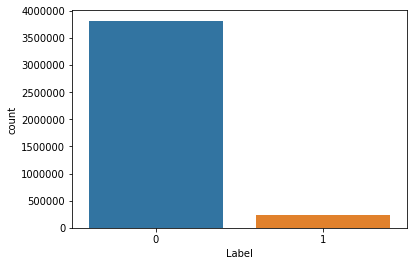

In [47]:
print(train.Label.value_counts())
sns.countplot(x='Label', data=train)

In [49]:
train.groupby('type').Label.value_counts()

type              Label
any               0        577159
                  1         97103
epidural          0        671501
                  1          2761
intraparenchymal  0        641698
                  1         32564
intraventricular  0        650496
                  1         23766
subarachnoid      0        642140
                  1         32122
subdural          0        631766
                  1         42496
Name: Label, dtype: int64

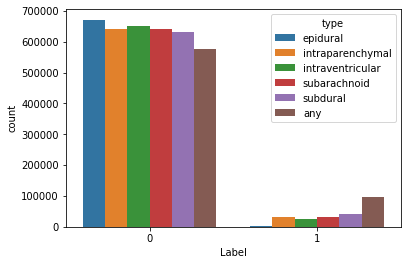

In [51]:
sns.countplot(x = 'Label', hue ='type', data = train)


In [66]:
train['filename']

0          ID_63eb1e259.png
1          ID_63eb1e259.png
2          ID_63eb1e259.png
3          ID_63eb1e259.png
4          ID_63eb1e259.png
5          ID_63eb1e259.png
6          ID_2669954a7.png
7          ID_2669954a7.png
8          ID_2669954a7.png
9          ID_2669954a7.png
10         ID_2669954a7.png
11         ID_2669954a7.png
12         ID_52c9913b1.png
13         ID_52c9913b1.png
14         ID_52c9913b1.png
15         ID_52c9913b1.png
16         ID_52c9913b1.png
17         ID_52c9913b1.png
18         ID_4e6ff6126.png
19         ID_4e6ff6126.png
20         ID_4e6ff6126.png
21         ID_4e6ff6126.png
22         ID_4e6ff6126.png
23         ID_4e6ff6126.png
24         ID_7858edd88.png
25         ID_7858edd88.png
26         ID_7858edd88.png
27         ID_7858edd88.png
28         ID_7858edd88.png
29         ID_7858edd88.png
                 ...       
4045542    ID_f737f4cc1.png
4045543    ID_f737f4cc1.png
4045544    ID_f737f4cc1.png
4045545    ID_f737f4cc1.png
4045546    ID_f737f4